In [1]:
pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# 2

Training with activation: logistic
Epoch 0, Train Loss: 2.3558, Val Loss: 2.3543
Epoch 10, Train Loss: 2.3000, Val Loss: 2.3000
Epoch 20, Train Loss: 2.2637, Val Loss: 2.2638
Epoch 30, Train Loss: 2.2172, Val Loss: 2.2174
Epoch 40, Train Loss: 2.1540, Val Loss: 2.1545
Epoch 50, Train Loss: 2.0787, Val Loss: 2.0800
Epoch 60, Train Loss: 2.0014, Val Loss: 2.0038
Epoch 70, Train Loss: 1.9301, Val Loss: 1.9335
Epoch 80, Train Loss: 1.8687, Val Loss: 1.8730
Epoch 90, Train Loss: 1.8162, Val Loss: 1.8205
Training with activation: tanh
Epoch 0, Train Loss: 2.0518, Val Loss: 2.0487
Epoch 10, Train Loss: 1.0249, Val Loss: 1.0311
Epoch 20, Train Loss: 0.7893, Val Loss: 0.8005
Epoch 30, Train Loss: 0.6708, Val Loss: 0.6878
Epoch 40, Train Loss: 0.5963, Val Loss: 0.6146
Epoch 50, Train Loss: 0.5440, Val Loss: 0.5682
Epoch 60, Train Loss: 0.5052, Val Loss: 0.5339
Epoch 70, Train Loss: 0.4744, Val Loss: 0.5072
Epoch 80, Train Loss: 0.4498, Val Loss: 0.4876
Epoch 90, Train Loss: 0.4288, Val Loss: 0.4

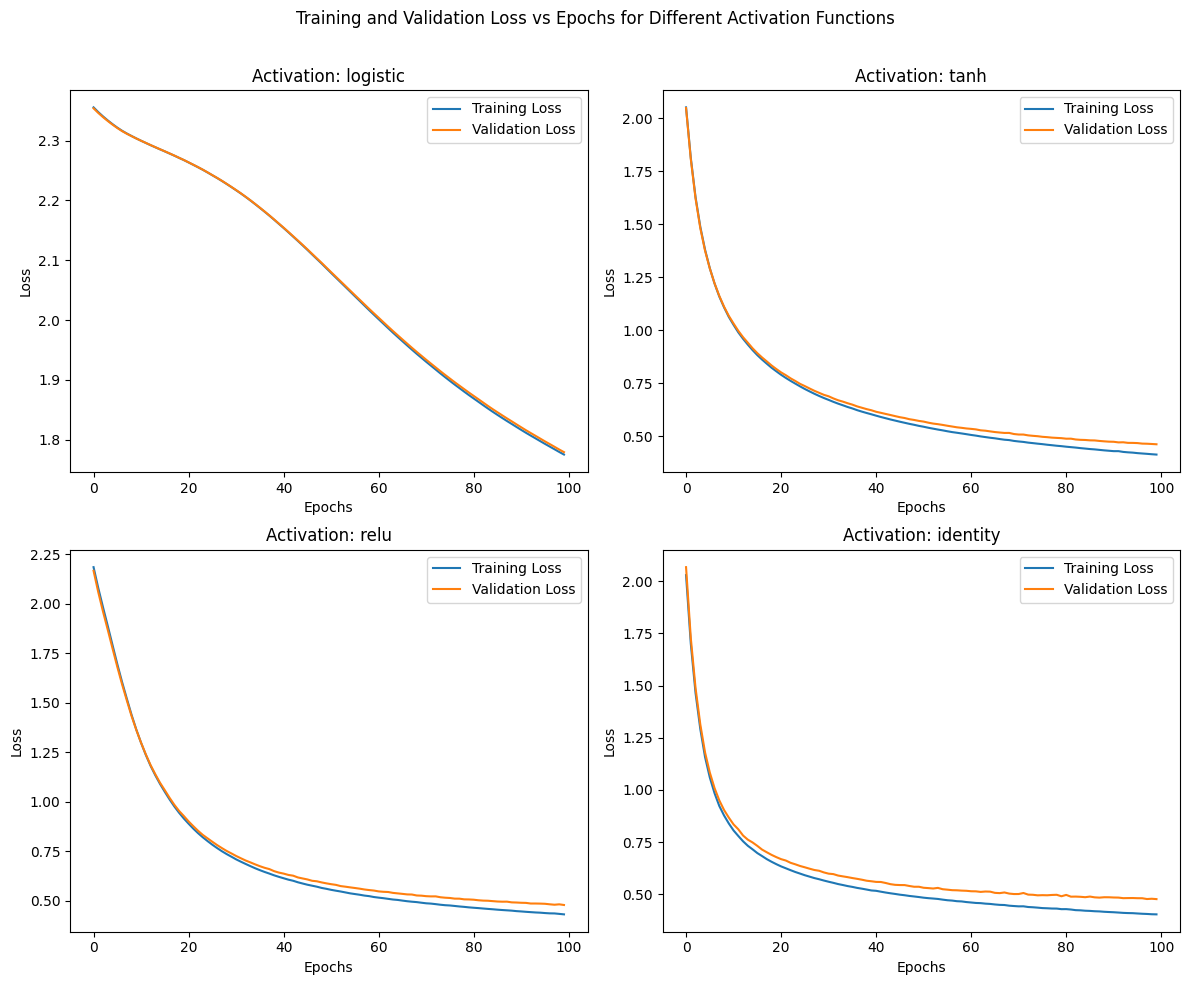

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the CSV files
train_data = pd.read_csv("dataset/new/fashion-mnist_train_split.csv")
test_data = pd.read_csv("dataset/new/fashion-mnist_test_split.csv")

# Separate features and labels
train_labels = train_data['label']
train_images = train_data.drop('label', axis=1) / 255.0  # Normalize
test_labels = test_data['label']
test_images = test_data.drop('label', axis=1) / 255.0    # Normalize

# Split train set into a smaller train and validation set
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Model parameters
hidden_layer_sizes = [128, 64, 32]
max_iter = 100
batch_size = 128
learning_rate_init = 2e-5
activations = ['logistic', 'tanh', 'relu', 'identity']

# Store results for plotting
history = {activation: {'train_loss': [], 'val_loss': []} for activation in activations}

# Open a text file to save the performance metrics
with open("performance_metrics.txt", "w") as f:
    # Train the MLPClassifier for each activation function
    for activation in activations:
        print(f"Training with activation: {activation}")
        f.write(f"Activation Function: {activation}\n")
        
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=1,  # Set to 1 so we can manually control the iterations
            batch_size=batch_size,
            solver='adam',
            learning_rate_init=learning_rate_init,
            activation=activation,
            warm_start=True  # Continue training in the loop
        )

        for epoch in range(max_iter):
            model.fit(X_train, y_train)  # Train for one iteration

            # Calculate training and validation losses
            train_loss = log_loss(y_train, model.predict_proba(X_train))
            val_loss = log_loss(y_val, model.predict_proba(X_val))

            # Record the losses
            history[activation]['train_loss'].append(train_loss)
            history[activation]['val_loss'].append(val_loss)

            # Write losses to the file
            f.write(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}\n")

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        f.write("\n")  # Separate results for different activations

# Plotting training and validation loss curves
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Training and Validation Loss vs Epochs for Different Activation Functions")

for i, activation in enumerate(activations):
    ax = axes[i // 2, i % 2]
    ax.plot(history[activation]['train_loss'], label="Training Loss")
    ax.plot(history[activation]['val_loss'], label="Validation Loss")
    ax.set_title(f"Activation: {activation}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("training_validation_loss.png")
plt.show()

# 3